Estimated execution speed for 23 zeros: -12.40 seconds
Time taken to compute 23 zeros: 1.30e-13 years


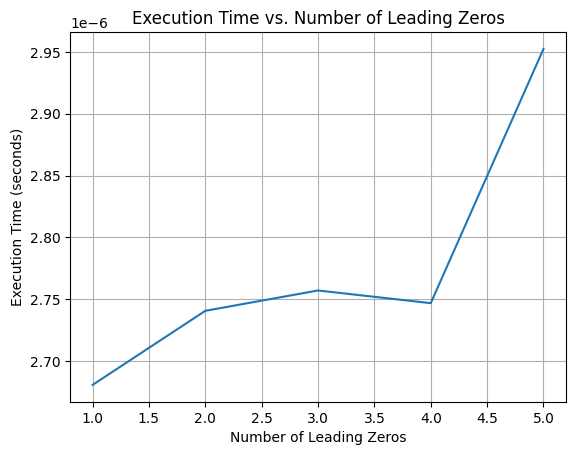

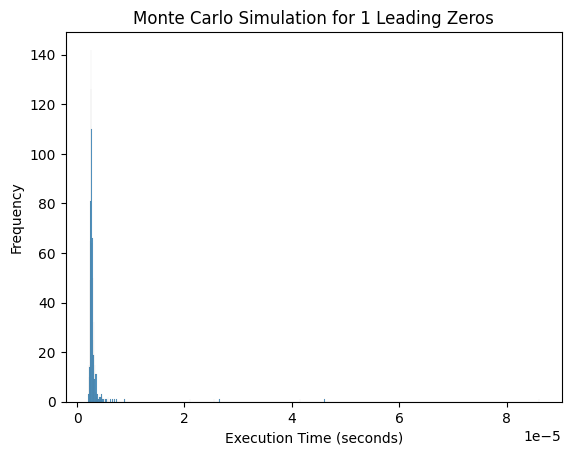

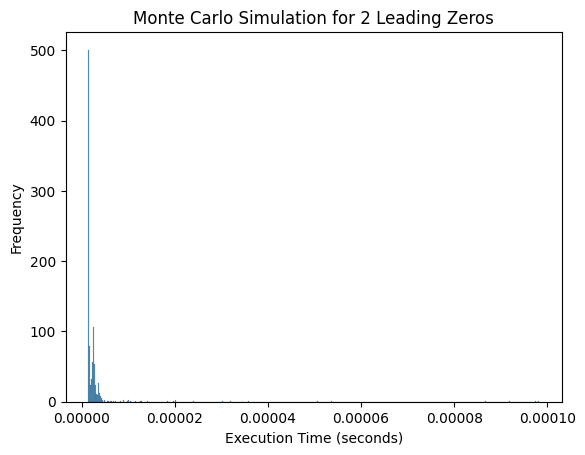

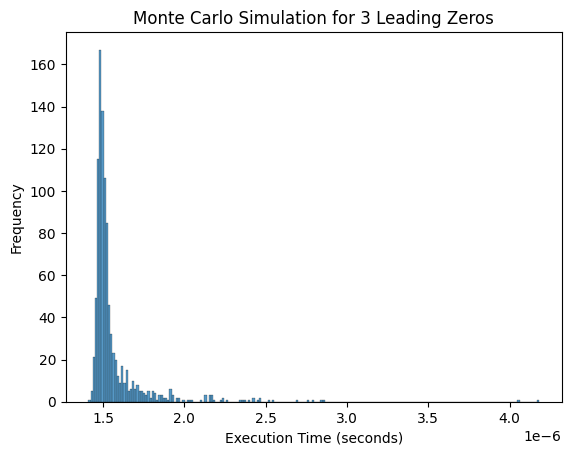

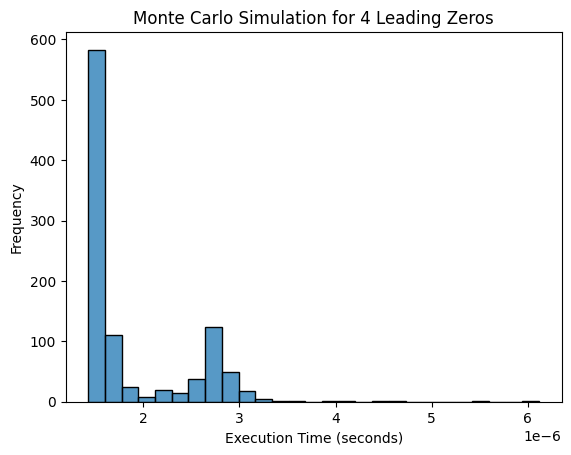

Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Previous Hash: 0
Data: Genesis Block
Nonce: 62357
Timestamp: 1696016289.4279037
Hash: 000015fcb1f7503cb70034cd8ba42639475367c19220da82611c8af29d39255a
Previous Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Data: Transaction 1
Nonce: 15281
Timestamp: 1696016289.5430272
Hash: 00005d1b4affed8725849186da4647f62b205069d4195fdb60fb02fcb19bd2e9
Previous Hash: 000015fcb1f7503cb70034cd8ba42639475367c19220da82611c8af29d39255a
Data: Transaction 2
Nonce: 12105
Timestamp: 1696016289.571472
Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Previous Hash: 0
Data: Genesis Block
Nonce: 62357
Timestamp: 1696016289.6004634
Hash: 000015fcb1f7503cb70034cd8ba42639475367c19220da82611c8af29d39255a
Previous Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Data: Transaction 1
Nonce: 15281
Timestamp: 1696016289.7115283
Hash: 00005d1b4affed8725849186da4647f62b205069d4195fdb60f

In [ ]:
import hashlib
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Function to calculate hashrate based on the number of leading zeros
def hashrate_calculator(zeros):
    num_attempts = 1000
    leading_zeros = zeros
    execution_times = []

    for _ in range(num_attempts):
        nonce = str(np.random.randint(1, 1000000))  # Generate a random nonce
        transactions = "P1 -> P2 5 BTC; P3 -> P4 1 BTC"
        combined_str = nonce + transactions

        start_time = time.time()

        hs = hashlib.sha256()
        hs.update(bytes(combined_str, 'utf-8'))
        output_hash = hs.hexdigest()

        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)

        if str(output_hash)[:leading_zeros] == "".join(leading_zeros * ['0']):
            final_nonce = nonce
            break  # Block is mined

    return np.mean(execution_times)

# Calculate execution times for different numbers of leading zeros
calculation_times = []
for i in range(1, 6):
    calculation_times.append(hashrate_calculator(i + 1))

# Linear regression to estimate the time required to calculate 23 zeros
from scipy import stats

# Calculate log times for linear regression
logs = [np.log(time) for time in calculation_times]

# Perform linear regression
slope, intercept, r, p, se = stats.linregress(list(range(1, 6)), logs)

# Define a regression function
def regress(x):
    return slope * x + intercept

# Calculate execution speed for 23 zeros
execution_speed = regress(23)
print(f"Estimated execution speed for 23 zeros: {execution_speed:.2f} seconds")

# Calculate time taken to execute 23 zeros in years
years_to_mine_23_zeros = np.exp(execution_speed) / 31557600
print(f"Time taken to compute 23 zeros: {years_to_mine_23_zeros:.2e} years")

# Plot execution times for different numbers of leading zeros
plt.plot(range(1, 6), calculation_times)
plt.xlabel("Number of Leading Zeros")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs. Number of Leading Zeros")
plt.grid(True)
plt.show()

# Simulate Bitcoin mining using Monte Carlo method
def monte_carlo(zeros, num_simulations=1000):
    execution_times = []

    for _ in range(num_simulations):
        execution_time = hashrate_calculator(zeros)
        execution_times.append(execution_time)

    return execution_times

# Visualize the distribution of execution times for different numbers of leading zeros
for zeros in range(1, 5):
    execution_times = monte_carlo(zeros)
    sns.histplot(execution_times)
    plt.xlabel("Execution Time (seconds)")
    plt.ylabel("Frequency")
    plt.title(f"Monte Carlo Simulation for {zeros} Leading Zeros")
    plt.show()

# Define a basic Block class
class Block:
    def __init__(self, data, previous_hash):
        self.data = data
        self.previous_hash = previous_hash
        self.timestamp = time.time()
        self.nonce = None
        self.hash = None

# Implement a basic blockchain
class Blockchain:
    def __init__(self):
        self.chain = []
        self.create_genesis_block()

    def create_genesis_block(self):
        genesis_block = Block("Genesis Block", "0")
        self.proof_of_work(genesis_block, leading_zeros=4)  # Adjust leading zeros as needed
        self.chain.append(genesis_block)

    def proof_of_work(self, block, leading_zeros=4):
        target = "0" * leading_zeros
        nonce = 0

        while True:
            data = str(block.data) + str(block.previous_hash) + str(nonce)
            calculated_hash = hashlib.sha256(data.encode()).hexdigest()

            if calculated_hash[:leading_zeros] == target:
                block.nonce = nonce
                block.hash = calculated_hash
                break

            nonce += 1

    def add_block(self, data):
        previous_block = self.chain[-1]
        new_block = Block(data, previous_block.hash)
        self.proof_of_work(new_block)  # Use default leading zeros for simplicity
        self.chain.append(new_block)

# Create a basic blockchain and add blocks
my_blockchain = Blockchain()
my_blockchain.add_block("Transaction 1")
my_blockchain.add_block("Transaction 2")

# Print the blockchain
for block in my_blockchain.chain:
    print(f"Hash: {block.hash}")
    print(f"Previous Hash: {block.previous_hash}")
    print(f"Data: {block.data}")
    print(f"Nonce: {block.nonce}")
    print(f"Timestamp: {block.timestamp}")
    print("=" * 40)

# Explore alternative consensus algorithms and their impact on the blockchain
# For example, you can implement a simple Proof of Stake (PoS) algorithm and compare it to Proof of Work (PoW)
# PoS can be based on the balance of the node's wallet as a measure of influence.

class PoSBlockchain(Blockchain):
    def __init__(self):
        super().__init__()

    def proof_of_stake(self, block, wallet_balance):
        # PoS logic: The higher the wallet balance, the easier to mine a block
        # For simplicity, we use wallet balance as a measure of influence
        target = "0" * (4 + wallet_balance // 1000)  # Adjust leading zeros based on wallet balance
        nonce = 0

        while True:
            data = str(block.data) + str(block.previous_hash) + str(nonce)
            calculated_hash = hashlib.sha256(data.encode()).hexdigest()

            if calculated_hash[:len(target)] == target:
                block.nonce = nonce
                block.hash = calculated_hash
                break

            nonce += 1

# Create a PoS blockchain and add blocks
pos_blockchain = PoSBlockchain()
pos_blockchain.add_block("Transaction 1")
pos_blockchain.add_block("Transaction 2")

# Print the PoS blockchain
for block in pos_blockchain.chain:
    print(f"Hash: {block.hash}")
    print(f"Previous Hash: {block.previous_hash}")
    print(f"Data: {block.data}")
    print(f"Nonce: {block.nonce}")
    print(f"Timestamp: {block.timestamp}")
    print("=" * 40)

# Explore additional consensus algorithms, such as Delegated Proof of Stake (DPoS), Proof of Authority (PoA), and others as needed.


In [ ]:
import random

# Block class remains the same
class Block:
    def __init__(self, data, previous_hash):
        self.data = data
        self.previous_hash = previous_hash
        self.timestamp = time.time()
        self.nonce = None
        self.hash = None
        self.delegate = None  # Add a delegate attribute to the block

# DPoSBlockchain class extends your existing Blockchain class
class DPoSBlockchain(Blockchain):
    def __init__(self, num_delegates=5):
        super().__init__()
        self.delegates = ["Delegate" + str(i) for i in range(num_delegates)]

    def delegate_selection(self):
        return random.choice(self.delegates)

    def create_block(self, data):
        previous_block = self.chain[-1]
        new_block = Block(data, previous_block.hash)
        new_block.delegate = self.delegate_selection()  # Assign a delegate to the block
        self.proof_of_work(new_block)  # Perform proof of work
        self.chain.append(new_block)

# Create a DPoS blockchain with 5 delegates
dpos_blockchain = DPoSBlockchain(num_delegates=5)
dpos_blockchain.create_block("Transaction 1")
dpos_blockchain.create_block("Transaction 2")

# Print the DPoS blockchain
for block in dpos_blockchain.chain:
    print(f"Hash: {block.hash}")
    print(f"Previous Hash: {block.previous_hash}")
    print(f"Data: {block.data}")
    print(f"Delegate: {block.delegate}")
    print(f"Timestamp: {block.timestamp}")
    print("=" * 40)


Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Previous Hash: 0
Data: Genesis Block
Delegate: None
Timestamp: 1696016503.0514288
Hash: 000015fcb1f7503cb70034cd8ba42639475367c19220da82611c8af29d39255a
Previous Hash: 00005b3f7b511566548fcb26a8bbf969ddcc7e3a00766a274509e0e5238254b7
Data: Transaction 1
Delegate: Delegate0
Timestamp: 1696016503.1616046
Hash: 00005d1b4affed8725849186da4647f62b205069d4195fdb60fb02fcb19bd2e9
Previous Hash: 000015fcb1f7503cb70034cd8ba42639475367c19220da82611c8af29d39255a
Data: Transaction 2
Delegate: Delegate4
Timestamp: 1696016503.1900582


In [ ]:
import hashlib
import time
import random

# Block class with additional attributes
class Block:
    def __init__(self, data, previous_hash):
        self.data = data
        self.previous_hash = previous_hash
        self.timestamp = time.time()
        self.nonce = None
        self.hash = None
        self.delegate = None  # Delegate assigned to the block

# DPoSBlockchain class
class DPoSBlockchain:
    def __init__(self, num_delegates=5):
        self.chain = []
        self.num_delegates = num_delegates
        self.delegates = ["Delegate" + str(i) for i in range(num_delegates)]
        self.delegate_votes = {delegate: 0 for delegate in self.delegates}
        self.create_genesis_block()

    def create_genesis_block(self):
        # Create the genesis block with default data
        genesis_block = Block("Genesis Block", "0")
        genesis_block.delegate = self.delegates[0]  # Assign a delegate for the genesis block
        self.chain.append(genesis_block)

    def delegate_selection(self):
        # Randomly select a delegate to create the next block
        return random.choice(self.delegates)

    def vote(self, voter, delegate):
        if delegate not in self.delegates:
            raise Exception("Invalid delegate")

        # Increment the vote count for the selected delegate
        self.delegate_votes[delegate] += 1

    def update_delegate_selection(self):
        # Select delegates with the highest number of votes
        selected_delegates = sorted(self.delegate_votes.keys(), key=lambda d: -self.delegate_votes[d])
        return selected_delegates

    def mine_block(self, block, leading_zeros=4):
        while True:
            block.nonce = random.randint(0, 1000000)
            block_hash = self.calculate_hash(block)
            if block_hash[:leading_zeros] == "0" * leading_zeros:
                block.hash = block_hash
                return block

    def calculate_hash(self, block):
        # Calculate the hash of a block based on its attributes
        data = f"{block.data}{block.previous_hash}{block.timestamp}{block.nonce}"
        return hashlib.sha256(data.encode()).hexdigest()

    def create_block(self, data, voter=None):
        if len(self.chain) == 0:
            raise Exception("Genesis block must be created first.")

        previous_block = self.chain[-1]
        new_block = Block(data, previous_block.hash)
        new_block.delegate = self.delegate_selection()  # Assign a delegate to the block
        mined_block = self.mine_block(new_block)

        # Increment delegate's vote count after creating a block
        self.delegate_votes[mined_block.delegate] += 1

        self.chain.append(mined_block)

    def get_voter_delegate(self, voter):
        # Simulate a method to determine the delegate of a voter
        # In practice, you may use a more sophisticated method
        return random.choice(self.delegates)

    def print_block(self, block):
        print("Block Information:")
        print(f"Hash: {block.hash}")
        print(f"Previous Hash: {block.previous_hash}")
        print(f"Data: {block.data}")
        print(f"Delegate: {block.delegate}")
        print(f"Timestamp: {block.timestamp}")
        print(f"Nonce: {block.nonce}")
        print("=" * 40)

# Example usage:
if __name__ == "__main__":
    dpos_blockchain = DPoSBlockchain(num_delegates=5)
    print("DPoS Blockchain Initialized")

    # Voting and block creation
    dpos_blockchain.vote("User1", "Delegate0")  # User1 votes for Delegate0
    dpos_blockchain.vote("User2", "Delegate1")  # User2 votes for Delegate1
    dpos_blockchain.vote("User3", "Delegate2")  # User3 votes for Delegate2
    dpos_blockchain.vote("User4", "Delegate3")  # User4 votes for Delegate3
    dpos_blockchain.vote("User5", "Delegate4")  # User5 votes for Delegate4

    print("Delegate Votes:")
    for delegate, votes in dpos_blockchain.delegate_votes.items():
        print(f"{delegate}: {votes} votes")

    dpos_blockchain.update_delegate_selection()  # Update delegate selection based on votes

    print("\nBlock Creation:")
    # Simulate block creation by delegates
    for i in range(1, 11):
        delegate = dpos_blockchain.delegate_selection()
        print(f"\nDelegate {delegate} creates Block {i}:")
        dpos_blockchain.create_block(f"Transaction {i}", voter=delegate)
        dpos_blockchain.print_block(dpos_blockchain.chain[-1])


DPoS Blockchain Initialized
Delegate Votes:
Delegate0: 1 votes
Delegate1: 1 votes
Delegate2: 1 votes
Delegate3: 1 votes
Delegate4: 1 votes

Block Creation:

Delegate Delegate1 creates Block 1:
Block Information:
Hash: 00008d317fbf1c26d7cf804814814ee7a1fdfe4a2f1128c3b7685a4cb00ded86
Previous Hash: None
Data: Transaction 1
Delegate: Delegate3
Timestamp: 1696017447.4138634
Nonce: 975823

Delegate Delegate1 creates Block 2:
Block Information:
Hash: 0000af0561eafd5087224f4bb24b8a7af3ac6ee0e63403c6d1ea530d29d2064d
Previous Hash: 00008d317fbf1c26d7cf804814814ee7a1fdfe4a2f1128c3b7685a4cb00ded86
Data: Transaction 2
Delegate: Delegate4
Timestamp: 1696017447.445276
Nonce: 276558

Delegate Delegate1 creates Block 3:
Block Information:
Hash: 0000264d08b4222f9b8e587fd3e32390b093965bc07439591c06311788d5fcc7
Previous Hash: 0000af0561eafd5087224f4bb24b8a7af3ac6ee0e63403c6d1ea530d29d2064d
Data: Transaction 3
Delegate: Delegate4
Timestamp: 1696017447.7501826
Nonce: 218250

Delegate Delegate0 creates Bloc

In [ ]:
# Block class with the 'authority' attribute
class Block:
    def __init__(self, data, previous_hash, authority):
        self.data = data
        self.previous_hash = previous_hash
        self.timestamp = time.time()
        self.nonce = None
        self.hash = None
        self.authority = authority  # Add an 'authority' attribute

# PoABlockchain class extends your existing Blockchain class
class PoABlockchain(Blockchain):
    def __init__(self, authorities=None):
        super().__init__()
        self.authorities = authorities if authorities else ["Authority1", "Authority2", "Authority3"]

    def create_genesis_block(self):
        # Create the genesis block with default data
        genesis_block = Block("Genesis Block", "0", "GenesisAuthority")
        self.chain.append(genesis_block)

    def create_block(self, data, authority):
        if authority not in self.authorities:
            raise Exception("Unauthorized authority")
        previous_block = self.chain[-1]
        new_block = Block(data, previous_block.hash, authority)  # Set the 'authority' attribute
        self.chain.append(new_block)

# Create a PoA blockchain with predefined authorities
poa_blockchain = PoABlockchain()
poa_blockchain.create_block("Transaction 1", "Authority1")
poa_blockchain.create_block("Transaction 2", "Authority2")

# Print the PoA blockchain
for block in poa_blockchain.chain:
    print(f"Hash: {block.hash}")
    print(f"Previous Hash: {block.previous_hash}")
    print(f"Data: {block.data}")
    print(f"Authority: {block.authority}")  # Access the 'authority' attribute
    print(f"Timestamp: {block.timestamp}")
    print("=" * 40)


Hash: None
Previous Hash: 0
Data: Genesis Block
Authority: GenesisAuthority
Timestamp: 1696017864.7605023
Hash: None
Previous Hash: None
Data: Transaction 1
Authority: Authority1
Timestamp: 1696017864.7605636
Hash: None
Previous Hash: None
Data: Transaction 2
Authority: Authority2
Timestamp: 1696017864.760613


In [30]:
import hashlib
import time

class Block:
    def __init__(self, index, data, previous_hash, timestamp, authority):
        self.index = index
        self.data = data
        self.previous_hash = previous_hash
        self.timestamp = timestamp
        self.authority = authority
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        data = f"{self.index}{self.data}{self.previous_hash}{self.timestamp}{self.authority}"
        return hashlib.sha256(data.encode()).hexdigest()

class PoABlockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.authorities = ["Authority1", "Authority2", "Authority3"]

    def create_genesis_block(self):
        return Block(0, "Genesis Block", "0", int(time.time()), "GenesisAuthority")

    def get_latest_block(self):
        return self.chain[-1]

    def create_block(self, data, authority):
        if authority not in self.authorities:
            raise Exception("Unauthorized authority")

        previous_block = self.get_latest_block()
        new_index = previous_block.index + 1
        new_timestamp = int(time.time())

        new_block = Block(new_index, data, previous_block.hash, new_timestamp, authority)
        self.chain.append(new_block)

    def print_chain(self):
        for block in self.chain:
            print("=" * 40)
            print(f"Index: {block.index}")
            print(f"Hash: {block.hash}")
            print(f"Previous Hash: {block.previous_hash}")
            print(f"Data: {block.data}")
            print(f"Authority: {block.authority}")
            print(f"Timestamp: {block.timestamp}")

# Create a PoA blockchain
poa_blockchain = PoABlockchain()

# Add blocks to the blockchain
poa_blockchain.create_block("Transaction 1", "Authority1")
poa_blockchain.create_block("Transaction 2", "Authority2")

# Print the PoA blockchain
poa_blockchain.print_chain()


Index: 0
Hash: 858d78a92da88dea6590462da9ea0f5e0ea8b3c57940856c9c0c10ea7fcf0114
Previous Hash: 0
Data: Genesis Block
Authority: GenesisAuthority
Timestamp: 1696018426
Index: 1
Hash: 24707bb7bd4413a23e0418a161e4a19e9e4c81cc80a357428be1de78bce52cc5
Previous Hash: 858d78a92da88dea6590462da9ea0f5e0ea8b3c57940856c9c0c10ea7fcf0114
Data: Transaction 1
Authority: Authority1
Timestamp: 1696018426
Index: 2
Hash: b5350b641084af78fd6af7416ecf3aee439b9b594ef246ec09ab5e9d92ca9f48
Previous Hash: 24707bb7bd4413a23e0418a161e4a19e9e4c81cc80a357428be1de78bce52cc5
Data: Transaction 2
Authority: Authority2
Timestamp: 1696018426
